In [67]:
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import HoverTool
from scipy .cluster.hierarchy import linkage
import numpy as np

In [68]:
output_notebook()

Loading BokehJS ...

In [69]:
(spark.sql('SHOW DATABASES').show())

+------------+
|databaseName|
+------------+
|     default|
| opengovdata|
|          sm|
|        test|
+------------+



In [70]:
spark.sql('SHOW TABLES FROM opengovdata').show(truncate = False)


+-----------+--------------------------------------+-----------+
|database   |tableName                             |isTemporary|
+-----------+--------------------------------------+-----------+
|opengovdata|civil_society_selected                |false      |
|opengovdata|civil_society_selected_vars_metadata  |false      |
|opengovdata|civil_society_selected_without_padding|false      |
|opengovdata|votes_austria                         |false      |
|opengovdata|votes_czech                           |false      |
|opengovdata|world_bank_full                       |false      |
|opengovdata|world_bank_selected                   |false      |
|opengovdata|world_bank_selected_vars_metadata     |false      |
|opengovdata|world_bank_selected_without_padding   |false      |
+-----------+--------------------------------------+-----------+



In [71]:
import pandas as pd

world_bank_selected = spark.sql("SELECT * FROM opengovdata.world_bank_selected")

world_bank_selected = world_bank_selected.toPandas()

In [72]:
world_bank_selected.head()

,COUNTRY,YEAR,NY_ADJ_AEDU_GN_ZS,NY_ADJ_ICTR_GN_ZS,NY_ADJ_NNTY_KD_ZG,NY_GDP_TOTL_RT_ZS,AG_LND_ARBL_ZS,IC_BUS_EASE_XQ,IC_EC_QJPI,IC_LGL_DURS,...,BN_CAB_XOKA_GD_ZS,CC_EST,GE_EST,PV_EST,RL_EST,RQ_EST,VA_EST,REGION,SUB_REGION,INTERMEDIATE_REGION
0,Afghanistan,1990.0,1.6,NaN,NaN,1.065727,12.11592,NaN,NaN,NaN,...,-5.915854,NaN,NaN,NaN,NaN,NaN,NaN,Asia,Southern Asia,
1,Afghanistan,1991.0,1.6,NaN,NaN,1.065727,12.11592,NaN,NaN,NaN,...,-5.915854,NaN,NaN,NaN,NaN,NaN,NaN,Asia,Southern Asia,
2,Afghanistan,1992.0,1.6,NaN,NaN,1.065727,12.11592,NaN,NaN,NaN,...,-5.915854,NaN,NaN,NaN,NaN,NaN,NaN,Asia,Southern Asia,
3,Afghanistan,1993.0,1.6,NaN,NaN,1.065727,11.98419,NaN,NaN,NaN,...,-5.915854,NaN,NaN,NaN,NaN,NaN,NaN,Asia,Southern Asia,
4,Afghanistan,1994.0,1.6,NaN,NaN,1.065727,11.79885,NaN,NaN,NaN,...,-5.915854,NaN,NaN,NaN,NaN,NaN,NaN,Asia,Southern Asia,


In [73]:
world_bank_selected.to_csv('wb.csv')

In [74]:
wb = world_bank_selected

In [75]:
civil_society_selected = spark.sql("SELECT * FROM opengovdata.civil_society_selected")

civil_society_selected = civil_society_selected.toPandas()

In [76]:
civil_society_selected.to_csv('cs.csv')

In [77]:
cs = civil_society_selected

In [78]:
cs.shape

(6104, 219)

In [79]:
cs.head()

,YEAR,COUNTRY,WAVE_WVS,WAVE_DESC_WVS,RESPONDED_CHURCH_N_WVS,RESPONDED_SPORT_N_WVS,RESPONDED_ARTMUSICEDU_N_WVS,RESPONDED_LABORUNION_N_WVS,RESPONDED_POLITICAL_N_WVS,RESPONDED_ENVIRONMENTAL_N_WVS,...,V2PEEDUEQ_VDEM,V2PEEDUEQ_NR_VDEM,V2PEHEALTH_VDEM,V2PEHEALTH_NR_VDEM,V2PEPRISCH_VDEM,V2PESECSCH_VDEM,V2PETERSCH_VDEM,REGION,SUB_REGION,INTERMEDIATE_REGION
0,1990.0,Afghanistan,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.103151,6.0,-1.514656,6.0,27.76105,14.003685,3.266262,Asia,Southern Asia,
1,1991.0,Afghanistan,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.103151,6.0,-1.514656,6.0,27.82737,14.355790,NaN,Asia,Southern Asia,
2,1992.0,Afghanistan,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.525333,6.0,-2.259946,6.0,27.89368,14.707895,NaN,Asia,Southern Asia,
3,1993.0,Afghanistan,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.987092,6.0,-2.360760,6.0,27.96000,15.060000,NaN,Asia,Southern Asia,
4,1994.0,Afghanistan,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.987092,6.0,-2.360760,6.0,40.67998,15.914286,NaN,Asia,Southern Asia,


In [80]:
_cee = cs[cs['SUB_REGION'] == 'Eastern Europe']
_cee.groupby('COUNTRY').apply(lambda x: x.apply(pd.Series.nunique))

,YEAR,COUNTRY,WAVE_WVS,WAVE_DESC_WVS,RESPONDED_CHURCH_N_WVS,RESPONDED_SPORT_N_WVS,RESPONDED_ARTMUSICEDU_N_WVS,RESPONDED_LABORUNION_N_WVS,RESPONDED_POLITICAL_N_WVS,RESPONDED_ENVIRONMENTAL_N_WVS,...,V2PEEDUEQ_VDEM,V2PEEDUEQ_NR_VDEM,V2PEHEALTH_VDEM,V2PEHEALTH_NR_VDEM,V2PEPRISCH_VDEM,V2PESECSCH_VDEM,V2PETERSCH_VDEM,REGION,SUB_REGION,INTERMEDIATE_REGION
COUNTRY,,,,,,,,,,,,,,,,,,,,,
Belarus,28,1,3,3,3,3,3,3,3,3,...,3,5,3,5,24,15,24,1,1,1
Bulgaria,28,1,2,2,2,2,2,2,2,2,...,10,5,10,4,24,23,19,1,1,1
Czech Republic,28,1,2,2,2,2,2,2,2,2,...,2,4,2,4,24,23,24,1,1,1
Hungary,28,1,2,2,2,2,2,2,2,2,...,6,4,6,4,24,24,24,1,1,1
Moldova,28,1,3,3,3,3,3,3,3,3,...,16,7,11,7,22,23,20,1,1,1
Poland,28,1,4,4,3,3,3,4,4,3,...,5,4,3,4,23,24,24,1,1,1
Romania,28,1,3,3,3,3,3,3,3,3,...,3,5,6,5,23,23,22,1,1,1
Russian Federation,28,1,4,4,4,4,4,4,4,4,...,7,4,7,4,24,24,24,1,1,1
Slovakia,28,1,2,2,2,2,2,2,2,2,...,2,4,1,4,21,21,21,1,1,1


In [81]:
cee = ['Hungary', 'Czech Republic', 'Poland']
chp = cs.query('COUNTRY in @cee')

In [82]:
h = chp[chp['COUNTRY'] == 'Hungary']

In [83]:
p = figure()
p.line(h.YEAR, h['v2xcs_ccsi_VDEM'.upper()])
show(p)

In [84]:
p = figure()
p.line(h.YEAR, h['v2x_cspart_VDEM'.upper()])
show(p)

In [85]:
h['v2x_cspart_VDEM'.upper()].nunique()

11

In [86]:
p = figure()
p.add_tools(HoverTool())
p.line(h.YEAR, h['v2xel_locelec_VDEM'.upper()])
hover = p.select(dict(type=HoverTool))
hover.tooltips = [
    ("Year", "@x"),
    ("Index", "@y"),
]
hover.mode = 'mouse'
show(p)

In [87]:
h_vdem = h.loc[:, h.columns.str.endswith('VDEM')]

In [88]:
h_vdem.apply(pd.Series.nunique)

V2X_POLYARCHY_VDEM     18
V2X_PARTIPDEM_VDEM     19
V2X_FREEXP_VDEM        18
V2XEL_FREFAIR_VDEM     13
V2X_CSPART_VDEM        11
V2XDD_CIC_VDEM         16
V2XDD_TOC_VDEM         16
V2XEL_LOCELEC_VDEM      3
V2XCS_CCSI_VDEM        10
V2X_GENDER_VDEM        18
V2X_GENCL_VDEM          6
V2X_GENCS_VDEM         10
V2X_GENPP_VDEM         16
V2X_CORR_VDEM          14
V2X_PUBCORR_VDEM        9
V2X_CIVLIB_VDEM        18
V2X_CLPRIV_VDEM         6
V2EXDFVTHS_VDEM         2
V2EXDFVTHS_NR_VDEM      4
V2EXDFVTHG_VDEM         3
V2EXDFVTHG_NR_VDEM      4
V2DLCONSLT_VDEM         7
V2DLCONSLT_NR_VDEM      3
V2DLENGAGE_VDEM         7
V2DLENGAGE_NR_VDEM      3
V2JUPOATCK_VDEM        10
V2JUPOATCK_NR_VDEM      4
V2JUACCNT_VDEM          6
V2JUACCNT_NR_VDEM       4
V2JUCORRDC_VDEM         3
                       ..
V2CSREPRSS_OSP_VDEM     8
V2CSCNSULT_VDEM         9
V2CSCNSULT_NR_VDEM      3
V2CSPRTCPT_VDEM         5
V2CSPRTCPT_NR_VDEM      3
V2CSGENDER_VDEM         3
V2CSGENDER_NR_VDEM      3
V2CSANTIMV_V

In [89]:
cs_meta = spark.sql("SELECT * FROM opengovdata.civil_society_selected_vars_metadata")
cs_meta = cs_meta.toPandas()

In [90]:
cs_meta[cs_meta['SOURCE'] == 'VDEM']

,VARIABLE,SOURCE,DESCRIPTION,MIN_YEAR,MAX_YEAR,NUM_UNIQUE_YEARS
132,v2x_polyarchy_VDEM,VDEM,Electoral democracy index,1990.0,2016.0,27.0
133,v2x_partipdem_VDEM,VDEM,Participatory democracy index,1990.0,2016.0,27.0
134,v2x_freexp_VDEM,VDEM,Freedom of expression index,1990.0,2016.0,27.0
135,v2xel_frefair_VDEM,VDEM,Clean elections index,1990.0,2016.0,27.0
136,v2x_cspart_VDEM,VDEM,Civil society participation index,1990.0,2016.0,27.0
137,v2xdd_cic_VDEM,VDEM,Citizen-initiated component of direct popular ...,1990.0,2016.0,27.0
138,v2xdd_toc_VDEM,VDEM,Top-Down component of direct popular vote index,1990.0,2016.0,27.0
139,v2xel_locelec_VDEM,VDEM,Local government index,1990.0,2016.0,27.0
140,v2xcs_ccsi_VDEM,VDEM,Core civil society index,1990.0,2016.0,27.0
141,v2x_gender_VDEM,VDEM,Women political empowerment index,1990.0,2016.0,27.0


In [91]:
merged = spark.sql("SELECT * FROM opengovdata.civil_society_selected cs join opengovdata.world_bank_selected wb on cs.YEAR = wb.YEAR AND cs.COUNTRY = wb.COUNTRY")
merged = merged.toPandas()

In [92]:
merged

,YEAR,COUNTRY,WAVE_WVS,WAVE_DESC_WVS,RESPONDED_CHURCH_N_WVS,RESPONDED_SPORT_N_WVS,RESPONDED_ARTMUSICEDU_N_WVS,RESPONDED_LABORUNION_N_WVS,RESPONDED_POLITICAL_N_WVS,RESPONDED_ENVIRONMENTAL_N_WVS,...,BN_CAB_XOKA_GD_ZS,CC_EST,GE_EST,PV_EST,RL_EST,RQ_EST,VA_EST,REGION,SUB_REGION,INTERMEDIATE_REGION
0,1990.0,Afghanistan,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,...,-5.915854,NaN,NaN,NaN,NaN,NaN,NaN,Asia,Southern Asia,
1,1991.0,Afghanistan,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,...,-5.915854,NaN,NaN,NaN,NaN,NaN,NaN,Asia,Southern Asia,
2,1992.0,Afghanistan,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,...,-5.915854,NaN,NaN,NaN,NaN,NaN,NaN,Asia,Southern Asia,
3,1993.0,Afghanistan,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,...,-5.915854,NaN,NaN,NaN,NaN,NaN,NaN,Asia,Southern Asia,
4,1994.0,Afghanistan,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,...,-5.915854,NaN,NaN,NaN,NaN,NaN,NaN,Asia,Southern Asia,
5,1995.0,Afghanistan,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,...,-5.915854,NaN,NaN,NaN,NaN,NaN,NaN,Asia,Southern Asia,
6,1996.0,Afghanistan,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,...,-5.915854,-1.291705,-2.175167,-2.414042,-1.788075,-2.090330,-1.908540,Asia,Southern Asia,
7,1997.0,Afghanistan,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,...,-5.915854,-1.291705,-2.175167,-2.414042,-1.788075,-2.090330,-1.908540,Asia,Southern Asia,
8,1998.0,Afghanistan,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,...,-5.915854,-1.180848,-2.135942,-2.422996,-1.737140,-2.087256,-2.039301,Asia,Southern Asia,
9,1999.0,Afghanistan,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,...,-5.915854,-1.180848,-2.135942,-2.422996,-1.737140,-2.087256,-2.039301,Asia,Southern Asia,


In [93]:
merged.to_csv('merged.csv')

In [94]:
merged = merged.loc[:, ~merged.columns.duplicated()]

In [95]:
nuniques = merged.groupby('COUNTRY').apply(lambda x: x.apply(pd.Series.nunique))

In [96]:
nuniques.loc['Ukraine', 'V2X_CSPART_VDEM']

27

In [97]:
h = merged[merged['COUNTRY'] == 'Hungary']

In [98]:
h.head()

,YEAR,COUNTRY,WAVE_WVS,WAVE_DESC_WVS,RESPONDED_CHURCH_N_WVS,RESPONDED_SPORT_N_WVS,RESPONDED_ARTMUSICEDU_N_WVS,RESPONDED_LABORUNION_N_WVS,RESPONDED_POLITICAL_N_WVS,RESPONDED_ENVIRONMENTAL_N_WVS,...,AG_PRD_FOOD_XD,AG_PRD_LVSK_XD,BG_GSR_NFSV_GD_ZS,BN_CAB_XOKA_GD_ZS,CC_EST,GE_EST,PV_EST,RL_EST,RQ_EST,VA_EST
2352,1990.0,Hungary,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,...,120.94,167.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2353,1991.0,Hungary,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,...,123.05,152.45,12.99913,1.160235,NaN,NaN,NaN,NaN,NaN,NaN
2354,1992.0,Hungary,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,...,97.70,134.71,15.61330,0.908759,NaN,NaN,NaN,NaN,NaN,NaN
2355,1993.0,Hungary,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,...,89.49,122.74,13.59790,-10.624586,NaN,NaN,NaN,NaN,NaN,NaN
2356,1994.0,Hungary,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,...,89.57,114.74,14.07558,-9.391875,NaN,NaN,NaN,NaN,NaN,NaN


In [99]:
h_vars = h.drop(['COUNTRY', 'YEAR'], axis=1)

TODO document .sort_values

In [100]:
mask = h_vars.apply(pd.Series.nunique) > 20

In [101]:
h_vars = h_vars.loc[:, mask]

In [102]:
h_vars = h_vars.dropna(axis=1, how='all')

In [103]:
h_vars

,V2PEPRISCH_VDEM,V2PESECSCH_VDEM,V2PETERSCH_VDEM,NY_ADJ_ICTR_GN_ZS,NY_ADJ_NNTY_KD_ZG,NY_GDP_TOTL_RT_ZS,AG_LND_ARBL_ZS,FP_CPI_TOTL_ZG,NY_GDP_MKTP_KD_ZG,NY_GDP_PCAP_CD,...,EN_ATM_CO2E_PC__SUSTAINABLEDEVELOPMENTGOALS,4_1_SHARE_RE_IN_ELECTRICITY,AG_LND_ARBL_ZS__WORLDDEVELOPMENTINDICATORS,AG_LND_CROP_ZS__WORLDDEVELOPMENTINDICATORS,AG_LND_FRST_ZS__WORLDDEVELOPMENTINDICATORS,AG_PRD_CROP_XD,AG_PRD_FOOD_XD,AG_PRD_LVSK_XD,BG_GSR_NFSV_GD_ZS,BN_CAB_XOKA_GD_ZS
2352,87.0000,77.000,14.00000,NaN,NaN,NaN,56.23679,28.970153,NaN,NaN,...,6.713651,0.69,56.23679,2.603761,20.04006,100.86,120.94,167.69,NaN,NaN
2353,88.1475,81.202,15.96000,NaN,NaN,1.195704,56.25904,34.234009,NaN,3349.770,...,6.418858,0.73,56.25904,2.570379,20.16913,110.78,123.05,152.45,12.99913,1.160235
2354,89.2950,85.404,17.92000,NaN,NaN,0.913000,52.76511,22.949801,-3.064180,3734.562,...,5.824429,0.64,52.76511,2.559252,20.29821,78.57,97.70,134.71,15.61330,0.908759
2355,90.4425,89.606,19.88000,14.21972,NaN,0.767406,52.83775,22.451053,-0.576109,3873.424,...,5.978002,0.62,52.83775,2.503895,20.42956,71.41,89.49,122.74,13.59790,-10.624586
2356,91.5900,93.808,21.84000,18.02566,3.612647,0.575186,52.84888,18.866390,2.947155,4172.765,...,5.692997,0.61,52.84888,2.503895,20.55865,81.80,89.57,114.74,14.07558,-9.391875
2357,90.5500,98.010,23.80000,21.25926,0.635807,0.585334,53.48320,28.302870,1.489525,4494.053,...,5.844712,0.64,53.48320,2.503895,20.68774,79.18,87.48,111.93,21.60675,-3.397106
2358,78.4600,89.795,26.24000,22.83360,-1.113219,0.615076,53.53884,23.428144,0.014155,4525.140,...,6.019061,0.73,53.53884,2.503895,20.81683,87.30,93.50,114.39,23.49502,-3.714297
2359,87.0200,81.580,28.68000,24.06178,3.152420,0.530771,53.67483,18.314130,3.340164,4595.525,...,5.916812,0.76,53.67483,2.527840,20.95991,91.91,96.98,112.39,23.24102,-4.108556
2360,95.9900,81.620,31.12000,23.95281,4.381427,0.264771,53.66370,14.175067,4.235848,4750.415,...,5.762721,0.58,53.66370,2.516704,21.08909,90.81,95.97,112.94,22.63328,-7.104597
2361,96.1300,83.540,33.56000,21.29569,1.483371,0.355325,53.61915,10.030926,3.186896,4802.959,...,5.743607,0.65,53.61915,2.494432,21.21826,85.22,91.24,113.05,22.41680,-7.893302


In [104]:
pd.Series([1,2,3,4,np.nan, np.nan, np.nan]).nunique()

4

In [105]:
corr_matrix = h_vars.corr()
import seaborn as sns
%matplotlib inline

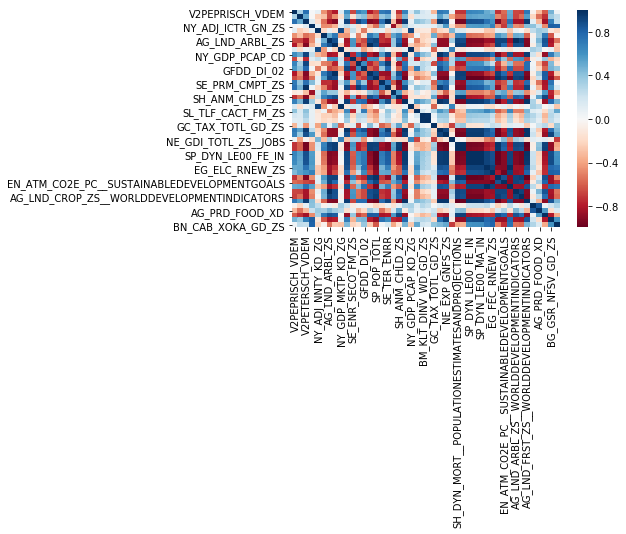

In [106]:
sns.heatmap(corr_matrix, cmap='RdBu')
Z = linkage(corr_matrix)

In [107]:
corr_matrix.shape

(46, 46)

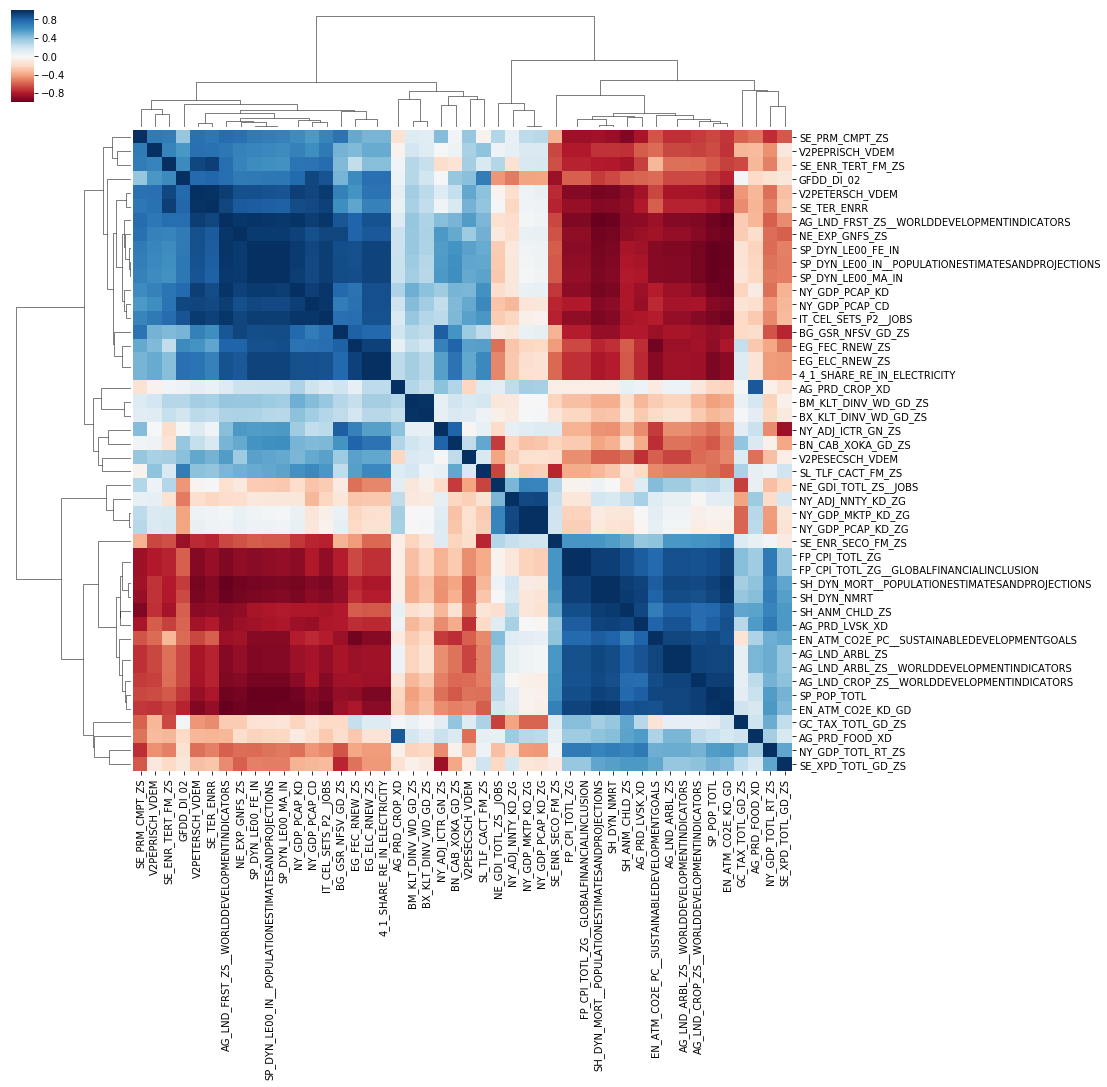

In [108]:
sns.clustermap(corr_matrix, cmap='RdBu', figsize=(14,14))

In [109]:
def relevant_vars(df):
    df = df.drop(['COUNTRY', 'YEAR'], axis=1)
    mask = df.apply(pd.Series.nunique) > 20
    df = df.loc[:, mask]
    df = df.dropna(axis=1, how='all')
    return df

In [110]:
_cee = merged[merged['SUB_REGION'] == 'Eastern Europe']

In [111]:
cee_grouped = _cee.groupby('COUNTRY')

In [112]:
cees = [relevant_vars(data) for country, data in cee_grouped]

In [113]:
corrs = [c.corr() for c in cees]

In [114]:
for corr in corrs:
    print(corr.shape)
    print(corr.isnull().values.any())

(48, 48)
False
(50, 50)
False
(45, 45)
False
(46, 46)
False
(51, 51)
False
(48, 48)
False
(48, 48)
False
(60, 60)
False
(45, 45)
False
(84, 84)
False


In [115]:
df_concat = pd.concat(corrs)

In [116]:
hm = df_concat.groupby(level=0).mean()

In [117]:
df_concat.shape

(525, 98)

In [118]:
by_row_index = df_concat.groupby(df_concat.index)
df_means = by_row_index.mean()

In [119]:
df_means

,1_1_ACCESS_ELECTRICITY_TOT,1_2_ACCESS_ELECTRICITY_RURAL,4_1_SHARE_RE_IN_ELECTRICITY,AG_LND_ARBL_ZS,AG_LND_ARBL_ZS__WORLDDEVELOPMENTINDICATORS,AG_LND_CROP_ZS__WORLDDEVELOPMENTINDICATORS,AG_LND_FRST_ZS__WORLDDEVELOPMENTINDICATORS,AG_PRD_CROP_XD,AG_PRD_FOOD_XD,AG_PRD_LVSK_XD,...,V2X_CORR_VDEM,V2X_CSPART_VDEM,V2X_FREEXP_VDEM,V2X_GENCL_VDEM,V2X_GENCS_VDEM,V2X_GENDER_VDEM,V2X_GENPP_VDEM,V2X_PARTIPDEM_VDEM,V2X_POLYARCHY_VDEM,V2X_PUBCORR_VDEM
1_1_ACCESS_ELECTRICITY_TOT,1.000000,0.992432,0.629055,-0.095468,-0.095468,-0.942120,0.934136,0.088078,-0.113298,-0.770359,...,0.505784,0.839591,-0.154302,-0.415303,0.359924,0.934589,0.967651,0.194087,0.019718,-0.372495
1_2_ACCESS_ELECTRICITY_RURAL,0.992432,1.000000,0.797756,0.724501,0.724501,-0.936193,0.911369,-0.468577,-0.616106,-0.789441,...,NaN,NaN,-0.014938,NaN,NaN,0.985110,0.982766,0.378075,0.168894,NaN
4_1_SHARE_RE_IN_ELECTRICITY,0.629055,0.797756,1.000000,-0.297434,-0.297434,-0.454444,0.588987,0.074989,-0.070188,-0.522638,...,0.663213,0.282512,0.100379,0.401399,0.282499,0.585878,0.573444,0.145922,0.327626,0.264838
AG_LND_ARBL_ZS,-0.095468,0.724501,-0.297434,1.000000,1.000000,0.231985,-0.698174,-0.170052,-0.076781,0.309965,...,-0.543113,-0.640046,0.327979,0.423340,0.062593,-0.253503,-0.073726,0.134713,0.206401,0.381790
AG_LND_ARBL_ZS__WORLDDEVELOPMENTINDICATORS,-0.095468,0.724501,-0.297434,1.000000,1.000000,0.231985,-0.698174,-0.170052,-0.076781,0.309965,...,-0.543113,-0.640046,0.327979,0.423340,0.062593,-0.253503,-0.073726,0.134713,0.206401,0.381790
AG_LND_CROP_ZS__WORLDDEVELOPMENTINDICATORS,-0.942120,-0.936193,-0.454444,0.231985,0.231985,1.000000,-0.580843,-0.092967,0.190859,0.777547,...,-0.532419,-0.683274,0.200854,0.359217,-0.256874,-0.848162,-0.921270,-0.255704,-0.138117,0.423198
AG_LND_FRST_ZS__WORLDDEVELOPMENTINDICATORS,0.934136,0.911369,0.588987,-0.698174,-0.698174,-0.580843,1.000000,0.253799,0.147558,-0.398963,...,0.469685,0.883797,-0.365795,-0.284524,0.165411,0.693540,0.922379,-0.062719,-0.146848,-0.414665
AG_PRD_CROP_XD,0.088078,-0.468577,0.074989,-0.170052,-0.170052,-0.092967,0.253799,1.000000,0.811432,0.187685,...,-0.288992,0.719632,-0.261231,-0.714709,0.004125,0.022843,0.114302,-0.272400,-0.244720,-0.772629
AG_PRD_FOOD_XD,-0.113298,-0.616106,-0.070188,-0.076781,-0.076781,0.190859,0.147558,0.811432,1.000000,0.565512,...,-0.492073,0.602448,-0.182934,-0.661538,-0.006085,-0.106936,-0.041092,-0.270869,-0.188958,-0.718310
AG_PRD_LVSK_XD,-0.770359,-0.789441,-0.522638,0.309965,0.309965,0.777547,-0.398963,0.187685,0.565512,1.000000,...,-0.723297,-0.439908,0.122935,0.025938,0.065717,-0.334900,-0.711429,-0.235491,-0.148051,0.122026


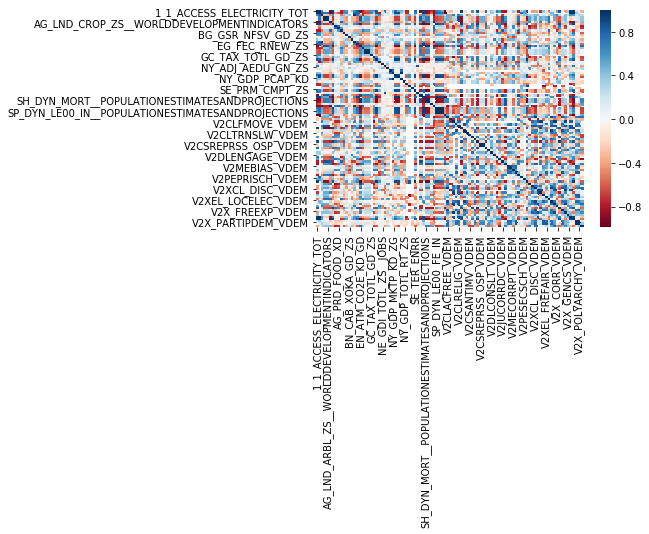

In [120]:
sns.heatmap(hm, cmap='RdBu')

In [122]:
# sns.clustermap(hm, cmap='RdBu', figsize=(14,14))

In [123]:
hm

,1_1_ACCESS_ELECTRICITY_TOT,1_2_ACCESS_ELECTRICITY_RURAL,4_1_SHARE_RE_IN_ELECTRICITY,AG_LND_ARBL_ZS,AG_LND_ARBL_ZS__WORLDDEVELOPMENTINDICATORS,AG_LND_CROP_ZS__WORLDDEVELOPMENTINDICATORS,AG_LND_FRST_ZS__WORLDDEVELOPMENTINDICATORS,AG_PRD_CROP_XD,AG_PRD_FOOD_XD,AG_PRD_LVSK_XD,...,V2X_CORR_VDEM,V2X_CSPART_VDEM,V2X_FREEXP_VDEM,V2X_GENCL_VDEM,V2X_GENCS_VDEM,V2X_GENDER_VDEM,V2X_GENPP_VDEM,V2X_PARTIPDEM_VDEM,V2X_POLYARCHY_VDEM,V2X_PUBCORR_VDEM
1_1_ACCESS_ELECTRICITY_TOT,1.000000,0.992432,0.629055,-0.095468,-0.095468,-0.942120,0.934136,0.088078,-0.113298,-0.770359,...,0.505784,0.839591,-0.154302,-0.415303,0.359924,0.934589,0.967651,0.194087,0.019718,-0.372495
1_2_ACCESS_ELECTRICITY_RURAL,0.992432,1.000000,0.797756,0.724501,0.724501,-0.936193,0.911369,-0.468577,-0.616106,-0.789441,...,NaN,NaN,-0.014938,NaN,NaN,0.985110,0.982766,0.378075,0.168894,NaN
4_1_SHARE_RE_IN_ELECTRICITY,0.629055,0.797756,1.000000,-0.297434,-0.297434,-0.454444,0.588987,0.074989,-0.070188,-0.522638,...,0.663213,0.282512,0.100379,0.401399,0.282499,0.585878,0.573444,0.145922,0.327626,0.264838
AG_LND_ARBL_ZS,-0.095468,0.724501,-0.297434,1.000000,1.000000,0.231985,-0.698174,-0.170052,-0.076781,0.309965,...,-0.543113,-0.640046,0.327979,0.423340,0.062593,-0.253503,-0.073726,0.134713,0.206401,0.381790
AG_LND_ARBL_ZS__WORLDDEVELOPMENTINDICATORS,-0.095468,0.724501,-0.297434,1.000000,1.000000,0.231985,-0.698174,-0.170052,-0.076781,0.309965,...,-0.543113,-0.640046,0.327979,0.423340,0.062593,-0.253503,-0.073726,0.134713,0.206401,0.381790
AG_LND_CROP_ZS__WORLDDEVELOPMENTINDICATORS,-0.942120,-0.936193,-0.454444,0.231985,0.231985,1.000000,-0.580843,-0.092967,0.190859,0.777547,...,-0.532419,-0.683274,0.200854,0.359217,-0.256874,-0.848162,-0.921270,-0.255704,-0.138117,0.423198
AG_LND_FRST_ZS__WORLDDEVELOPMENTINDICATORS,0.934136,0.911369,0.588987,-0.698174,-0.698174,-0.580843,1.000000,0.253799,0.147558,-0.398963,...,0.469685,0.883797,-0.365795,-0.284524,0.165411,0.693540,0.922379,-0.062719,-0.146848,-0.414665
AG_PRD_CROP_XD,0.088078,-0.468577,0.074989,-0.170052,-0.170052,-0.092967,0.253799,1.000000,0.811432,0.187685,...,-0.288992,0.719632,-0.261231,-0.714709,0.004125,0.022843,0.114302,-0.272400,-0.244720,-0.772629
AG_PRD_FOOD_XD,-0.113298,-0.616106,-0.070188,-0.076781,-0.076781,0.190859,0.147558,0.811432,1.000000,0.565512,...,-0.492073,0.602448,-0.182934,-0.661538,-0.006085,-0.106936,-0.041092,-0.270869,-0.188958,-0.718310
AG_PRD_LVSK_XD,-0.770359,-0.789441,-0.522638,0.309965,0.309965,0.777547,-0.398963,0.187685,0.565512,1.000000,...,-0.723297,-0.439908,0.122935,0.025938,0.065717,-0.334900,-0.711429,-0.235491,-0.148051,0.122026


In [124]:
hm = df_concat.groupby(level=0).mean()

In [125]:
a = pd.DataFrame({'a': [1, 2], 'b': [3, 4]}, index=['a', 'b'])
b = pd.DataFrame({'b': [3.5, 4.5, 2], 'a': [2.5, 2.5, 2], 'c': [1, 2, 3]}, index=['a', 'b', 'c'])
z = pd.DataFrame({'d': [3.5, 4.5], 'e': [0, 1]}, index=['d', 'e'])
c = pd.concat([a, b, z])

In [126]:
c.groupby(level=0).mean()

,a,b,c,d,e
a,1.75,3.25,1.0,NaN,NaN
b,2.25,4.25,2.0,NaN,NaN
c,2.00,2.00,3.0,NaN,NaN
d,NaN,NaN,NaN,3.5,0.0
e,NaN,NaN,NaN,4.5,1.0


In [127]:
a

,a,b
a,1,3
b,2,4


In [128]:
b

,a,b,c
a,2.5,3.5,1
b,2.5,4.5,2
c,2.0,2.0,3


In [129]:
z

,d,e
d,3.5,0
e,4.5,1


# Ukraine

In [130]:
ukr = relevant_vars(merged[merged['COUNTRY'] == 'Ukraine'])

In [131]:
ukr

,V2X_POLYARCHY_VDEM,V2X_PARTIPDEM_VDEM,V2X_FREEXP_VDEM,V2XEL_FREFAIR_VDEM,V2X_CSPART_VDEM,V2XEL_LOCELEC_VDEM,V2XCS_CCSI_VDEM,V2X_GENDER_VDEM,V2X_GENCL_VDEM,V2X_GENCS_VDEM,...,1_1_ACCESS_ELECTRICITY_TOT,4_1_SHARE_RE_IN_ELECTRICITY,AG_LND_ARBL_ZS__WORLDDEVELOPMENTINDICATORS,AG_LND_CROP_ZS__WORLDDEVELOPMENTINDICATORS,AG_LND_FRST_ZS__WORLDDEVELOPMENTINDICATORS,AG_PRD_CROP_XD,AG_PRD_FOOD_XD,AG_PRD_LVSK_XD,BG_GSR_NFSV_GD_ZS,BN_CAB_XOKA_GD_ZS
5628,NaN,NaN,0.731792,0.704722,0.257200,0.780126,0.293214,NaN,0.868592,0.867472,...,90.19204,3.52,NaN,NaN,16.00759,NaN,NaN,NaN,NaN,NaN
5629,0.410795,0.221598,0.752814,0.725009,0.381936,0.864939,0.603735,0.703886,0.883869,0.861080,...,90.81760,4.21,NaN,NaN,16.00759,NaN,NaN,NaN,NaN,NaN
5630,0.578649,0.331102,0.820884,0.733723,0.543694,0.924199,0.614076,0.711531,0.880601,0.855278,...,91.44272,3.12,57.58522,1.888323,16.08907,99.44,126.53,166.24,NaN,NaN
5631,0.572127,0.325880,0.820920,0.733723,0.526697,0.924220,0.615481,0.722200,0.884950,0.888864,...,92.06512,4.81,57.53689,1.869336,16.12980,112.32,127.36,150.82,NaN,NaN
5632,0.581648,0.333831,0.858075,0.671998,0.521320,0.932625,0.661973,0.719073,0.894287,0.879767,...,92.68211,5.98,57.46267,1.839993,16.17054,81.26,103.41,142.69,8.612823,-2.213149
5633,0.589622,0.330866,0.838304,0.655874,0.512249,0.906170,0.659337,0.748997,0.887795,0.903712,...,93.29099,5.14,57.45404,1.800293,16.21127,85.82,105.03,130.94,9.764825,-2.389354
5634,0.587772,0.332158,0.828444,0.670550,0.536230,0.908231,0.670321,0.736078,0.887627,0.882681,...,93.88905,4.72,57.28661,1.764046,16.25201,75.15,92.96,115.44,15.018601,-2.657206
5635,0.557186,0.299971,0.803732,0.669974,0.535646,0.818108,0.581421,0.741209,0.890062,0.888022,...,94.47356,5.54,57.10020,1.726072,16.29274,85.08,93.55,101.73,14.498389,-2.661993
5636,0.452901,0.248731,0.733517,0.407261,0.527603,0.823397,0.562720,0.760445,0.882880,0.884546,...,95.04185,9.12,56.71528,1.662208,16.33348,69.26,80.38,96.78,16.837283,-3.094316
5637,0.432705,0.239006,0.735583,0.339708,0.520679,0.823397,0.575267,0.783085,0.885921,0.883851,...,95.59231,8.33,56.39078,1.631138,16.37421,63.03,78.27,95.77,21.361189,5.250052


In [132]:
corr_matrix = ukr.corr()

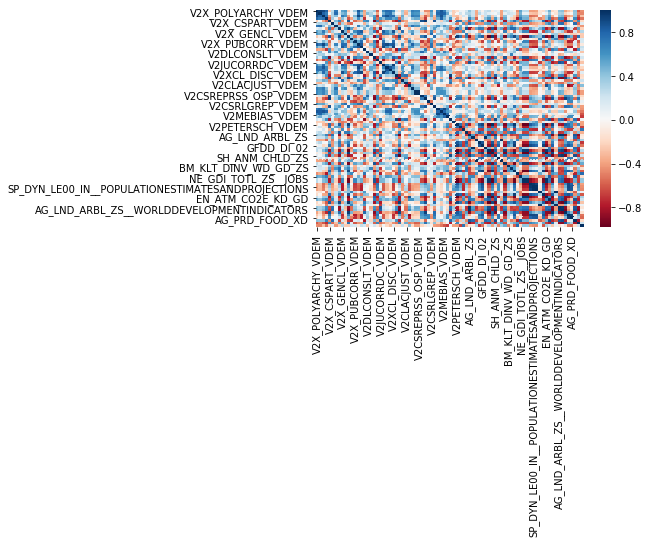

In [133]:
sns.heatmap(corr_matrix, cmap='RdBu')

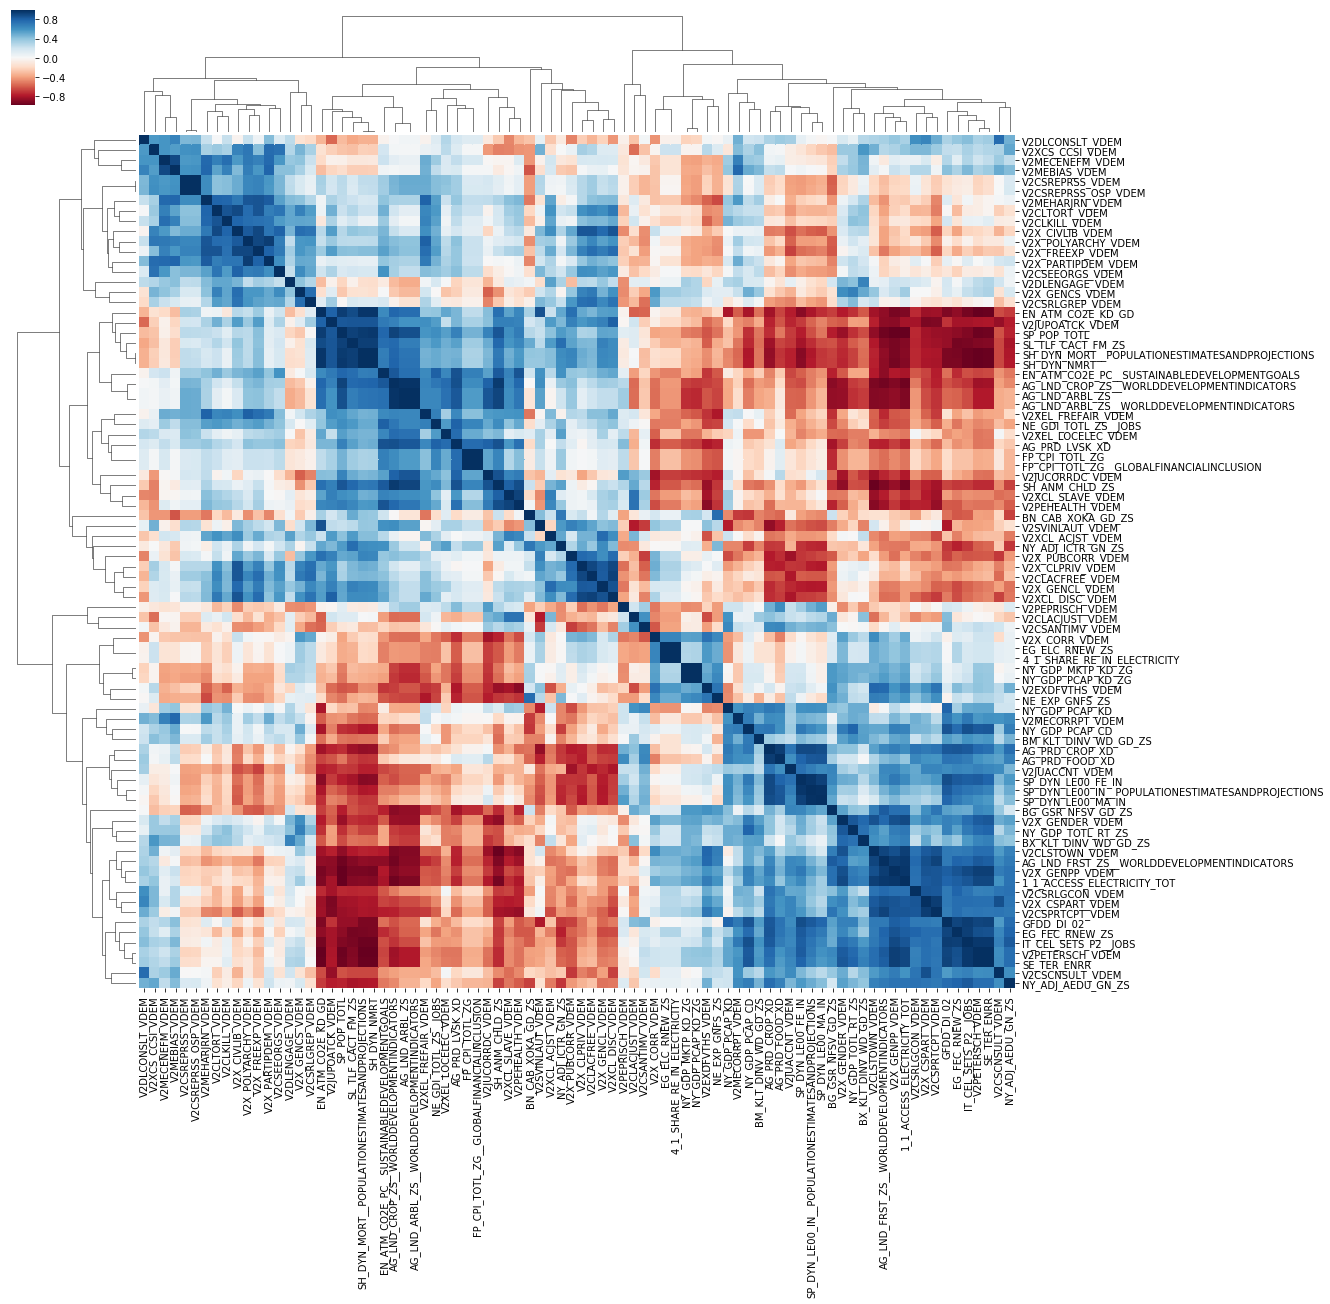

In [134]:
sns.clustermap(corr_matrix, cmap='RdBu', figsize=(18,18))

Top 10 negatively correllated variables

In [135]:
corr_matrix['V2X_CSPART_VDEM'].sort_values()[:11]

V2JUPOATCK_VDEM                                  -0.918912
EN_ATM_CO2E_KD_GD                                -0.839324
SP_POP_TOTL                                      -0.825213
SL_TLF_CACT_FM_ZS                                -0.813114
SH_DYN_NMRT                                      -0.797805
SH_DYN_MORT__POPULATIONESTIMATESANDPROJECTIONS   -0.793853
V2XCL_SLAVE_VDEM                                 -0.776884
V2PEHEALTH_VDEM                                  -0.763274
SH_ANM_CHLD_ZS                                   -0.761907
AG_LND_CROP_ZS__WORLDDEVELOPMENTINDICATORS       -0.683274
EN_ATM_CO2E_PC__SUSTAINABLEDEVELOPMENTGOALS      -0.657469
Name: V2X_CSPART_VDEM, dtype: float64

Top 10 positively correllated variables

In [137]:
corr_matrix['V2X_CSPART_VDEM'].sort_values(ascending=False)[:11]

V2X_CSPART_VDEM                               1.000000
V2CSPRTCPT_VDEM                               0.948018
AG_LND_FRST_ZS__WORLDDEVELOPMENTINDICATORS    0.883797
V2CSCNSULT_VDEM                               0.881897
V2X_GENPP_VDEM                                0.863001
V2CSRLGCON_VDEM                               0.857855
1_1_ACCESS_ELECTRICITY_TOT                    0.839591
V2CLSTOWN_VDEM                                0.838088
IT_CEL_SETS_P2__JOBS                          0.765118
EG_FEC_RNEW_ZS                                0.760293
V2PETERSCH_VDEM                               0.756313
Name: V2X_CSPART_VDEM, dtype: float64